# Semantic Search Engine using Deep Contextualized Language Representation:
## Privacy & Smart Home

In [2]:
# Import packages

from gensim.test.utils import datapath
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import spatial
import pickle
import pandas as pd

# Load documents with JSD <= 0.4 from the reference document for each topic
topic_19_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_19_df.csv"))
topic_18_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_18_df.csv"))
topic_9_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_9_df.csv"))
topic_7_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_7_df.csv"))
topic_4_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_4_df.csv"))
topic_16_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_16_df.csv"))
topic_15_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_15_df.csv"))
topic_11_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_11_df.csv"))
topic_5_df = pd.read_csv(datapath("inspection\\nb5_na04_topic_5_df.csv"))

#change column name
for df in (topic_19_df, topic_18_df, topic_9_df, topic_7_df, topic_4_df, topic_16_df,
           topic_15_df, topic_11_df, topic_5_df):
    new_columns = df.columns.values
    new_columns[0] = 'raw_index'
    df.columns = new_columns

print("Num. of documents with JSD score of <= 0.4 from reference document:")
print("In topic 19: ", topic_19_df.shape[0])
print("In topic 18: ", topic_18_df.shape[0])
print("In topic 9: ", topic_9_df.shape[0])
print("In topic 7: ", topic_7_df.shape[0])
print("In topic 4: ", topic_4_df.shape[0])
print("In topic 16: ", topic_16_df.shape[0])
print("In topic 15: ", topic_15_df.shape[0])
print("In topic 11: ", topic_11_df.shape[0])
print("In topic 5: ", topic_5_df.shape[0])

Num. of documents with JSD score of <= 0.4 from reference document:
In topic 19:  776
In topic 18:  868
In topic 9:  404
In topic 7:  336
In topic 4:  148
In topic 16:  155
In topic 15:  91
In topic 11:  244
In topic 5:  83


## How much does privacy feature in discourse within each topics?
### Load ELMo vectors for documents with a Jensen-Shannon Distance <= 0.4 from the reference document for each topics

In [3]:
def ELMo_vectors(topic_num):
    ELMo_file = datapath("ELMo_vectors\\ELMo_trained_{}.pkl".format(topic_num))

    with open(ELMo_file, "rb") as f:
        ELMo_topic = pickle.load(f)
    
    return ELMo_topic

ELMo_19 = ELMo_vectors(19)
ELMo_18 = ELMo_vectors(18)
ELMo_9 = ELMo_vectors(9)
ELMo_7 = ELMo_vectors(7)
ELMo_4 = ELMo_vectors(4)
ELMo_16 = ELMo_vectors(16)
ELMo_15 = ELMo_vectors(15)
ELMo_11 = ELMo_vectors(11)
ELMo_5 = ELMo_vectors(5)

### Semantic Search Engine

Search query:
1. Kokolakis, S. (2017). Privacy attitudes and privacy behaviour: A review of current research on the privacy paradox phenomenon. Computers and Security, 64, 122–134. https://doi.org/10.1016/j.cose.2015.07.002

2. Awad, N. F., & Krishnan, M. S. (2016). The Personalization Privacy Paradox : An Empirical Evaluation Of Information Transparency And The Willingness To Be Profiled Online For Personalization. MIS Quarterly, 30(1), 13–28. https://www.jstor.org/stable/25148715

3. Norberg, P. A., Horne, D. R., & Horne, D. A. (2007). The privacy paradox: Personal information disclosure intentions versus behaviors. Journal of Consumer Affairs, 41(1), 100–126. https://doi.org/10.1111/j.1745-6606.2006.00070.x

In [9]:
# Load ELMo vecotr for the query
privacy_rich_text_query = datapath("ELMo_vectors\\privacy_rich_text_query.pkl")
with open(privacy_rich_text_query, "rb") as f:
    privacy_rich_text_query = pickle.load(f)

### Cosine similarity distribution of privacy within the topics

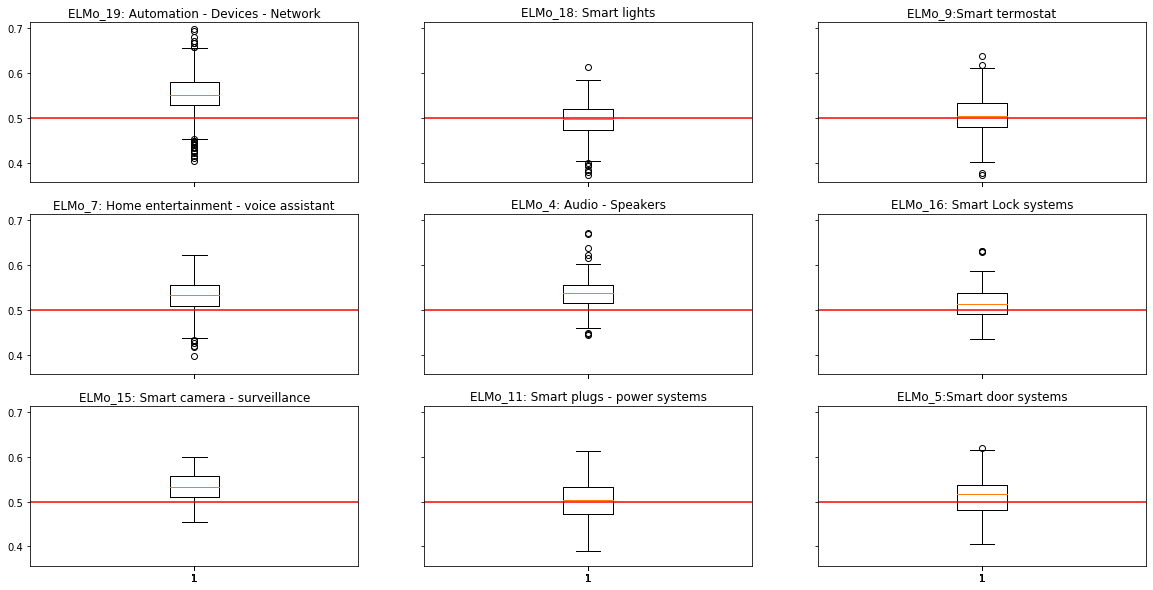

In [10]:
import matplotlib.pyplot as plt

# Run cosine similarity to compare the privacy search query against the ELMo vectors from the documents within each topic.
final = []
for model in [ELMo_19, ELMo_18, ELMo_9, ELMo_7, ELMo_4, ELMo_16, ELMo_15, ELMo_11, ELMo_5]:
    result = []
    for doc_vect in model:
        result.append(1 - spatial.distance.cosine(privacy_rich_text_query, doc_vect))
    final.append(result)
    
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(20, 10))

name = ['ELMo_19: Automation - Devices - Network', 'ELMo_18: Smart lights', 'ELMo_9:Smart termostat', 
        'ELMo_7: Home entertainment - voice assistant', 'ELMo_4: Audio - Speakers', 'ELMo_16: Smart Lock systems', 
        'ELMo_15: Smart camera - surveillance', 'ELMo_11: Smart plugs - power systems', 'ELMo_5:Smart door systems']

for i in range(3):
    for j in range(3):
        axs[i, j].boxplot(final[i*3+j])
        axs[i, j].axhline(y=0.5, color='r', linestyle='-')
        axs[i, j].set_title('{}'.format(name[i*3+j]))

**COMMENT**:  <br/>
Privacy feature more in topic:
* Automation -Devices - Network
* Home entertainment - voice assistant
* Audio - Speakers
* Smart camera - surveillance

# Cluster the contextual vectors for privacy based on our training data
## TOPIC 19: Automation - Devices - Network

In [233]:
# Calculate cosine similarity for documents of topic 19 against privacy's rich query text
idx_19_cosine = pd.DataFrame({'raw_index': list(topic_19_df.raw_index),
                             'cosine_similarity': final[0]})

# Subset only for documents with a cosine similarity score above 60
idx_19_cosine = idx_19_cosine.where(idx_19_cosine.cosine_similarity > 0.60).dropna()

ELMo_19_subset = [ELMo_19[int(idx)] for idx in idx_19_cosine.index]
topic_19_subset = topic_19_df[['text', 'raw_index']].loc[topic_19_df['raw_index'].isin(idx_19_cosine.raw_index)]


In [234]:
topic_19_subset = 'INDEX: '+ topic_19_subset['raw_index'].astype(str) +' <br /> '+ topic_19_subset['text']

In [235]:
idx_19_cosine.sort_values(by='cosine_similarity', ascending=False)

,raw_index,cosine_similarity
0,2.0,0.697698
498,1160.0,0.694945
185,4534.0,0.681408
350,4943.0,0.671257
585,3494.0,0.668206
...,...,...
394,5031.0,0.600881
235,2602.0,0.600632
644,1639.0,0.600526
158,366.0,0.600312


#### PCA and TSNE visualization

In [274]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=int(topic_19_subset.shape[0] / 2)) #reduce down dim
y = pca.fit_transform(ELMo_19_subset)
y = TSNE(n_components=2).fit_transform(y) # further reduce to 2 dim using t-SNE


In [276]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import chart_studio
chart_studio.tools.set_credentials_file(username='researcher_au', api_key='czWjQw6GpbgSb0ViJMCY')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import re

data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        # add a new line every 10 words and a new line at every comments
        text=['<br />'.join([' '.join(re.sub(r"[><]", "<br />", line).split()[i:i+10]) 
              for i in range(0, len(line.split()), 10)]) 
              for line in topic_19_subset],
    marker=dict(
        size=10,
        color = [i for i in idx_19_cosine['cosine_similarity']], #set color equal to the cosine similarity
        opacity= 0.8,
        colorscale='Viridis',
        showscale=True,
        cmax=0.70,
        cmin=0.60,
        colorbar = dict(title = "Cosine Similarity")
    )
    )
]
layout = go.Layout()
layout = dict(
              title="PCA and t-SNE dimensionality reduction: TOPIC 19 & PRIVACY",
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Topic_19_privacy')


#### Random text extraction

In [277]:
list(topic_19_df['text'].where(topic_19_df.raw_index == 1160).dropna())

["Google Home/Amazon Alexa users, can I trust these devices with my personal information? <SUB> I am looking to purchase either Google Home or Amazon Alexa, however I am little concerned due to a privacy issue.   <SUB> Depends on  what level of privacy you're concerned about.\n\n- Are you concerned that they will snoop in on your day to day conversations?  If so you'll likely be fine, they only record and transmit what is said after their wake-up word.  Security specialists have monitored the hell out of these things and have found no evidence they are actively spying on people.\n\n- Are you concerned that a voiceprint and profile will be made via your interactions of the device?  This will be the more likely case with these devices.  And it'll come down to how concerned you are on the usage of that data once you've given it over.\n\nThis next part is highly subjective, but of the two products, I'd err with Amazon for the sake of privacy.  This is mostly because their primary goal with

In [193]:
list(topic_19_df['text'].where(topic_19_df.raw_index == 295).dropna())

["Introducing Hass.io <SUB> nan <SUB> What does this mean? Does this in theory mean I could setup a local network for home automation instead of hitting external sources that SmartThings requires to change my Ecobee?\r\n\r\nJust wondering why I would go to this over using Google Assistant and SmartThings to control everything? <NEW TIER> Yes you can take the vendor specific server layer out.  If Smartthings gets hacked then your home automation is compromised.  With using HASS instead, someone would have to specifically target your house to have a any shot at compromising.  Also, (i dont use smarthings so i dont know if it has an offline like vera) while in your home, if the internet is down you still have full control with HASS. <SAME TIER> I take it you're asking about Home Assistant in general rather than this particular announcement? It is a bit of software that you can run on a computer/raspberry Pi to create a home automation hub. It is a free local-network-based alternative to S

In [196]:
list(topic_19_df['text'].where(topic_19_df.raw_index == 107).dropna())

["Hubs that work WITHOUT internet/cloud, software packages, and hardware recommendations? <SUB> I want to start doing some home automation, but so many of the posts I see mention how crippled many of the hubs are, by their reliance on the cloud.  So this is me begging for suggestions.\n\nAre there any commodity hubs out there than work, even at a basic level, without internet and without putting all that data in some company's hands?  Is the only option a z-wave stick and a raspberry pi?  Only mature software package with an attached app openhab?  I don't mind scripting stuff myself, but if this can only be controlled from a CLI, it will end up mostly being an annoyance for everyone else in the house.\n\nI was going to start simple: a dimmer switch, thermostat &amp; 1 outlet.  My hope was something like the GE 12729 for the outlet, which claims it can monitor power usage as well, something comparable to the nest we used to have, but that I can log data from and control on my own, and b

In [222]:
list(topic_19_df['text'].where(topic_19_df.raw_index == 2).dropna())

['Best Roomba Alternatives - Cheaper, Stronger &amp; Better (2018 Edition) <SUB> nan <SUB> Please share instructions on how to do this if you have useful tutorials. A lot of people will find it useful in the coming months and years: https://twitter.com/cleanapp/status/950791307735289856?s=21 <NEW TIER> Can you get off of my post with your spam please <NEW TIER> didn\'t realize this was YOUR post. What you\'re characterizing as "spam" is full-spectral analysis of the 2018-2020+ robovac space by a nonprofit that has nothing but YOUR best interests in mind.  The last post was a response to someone who shared insight that we think ties in with the ongoing Xiaomi/Roomba data privacy debate. If you don\'t think that these are considerations that people should weigh when asking what\'s "better" than a "Roomba" -- then you should take a moment to learn about Amazon Vesta. Please familiarize yourself with our posture in the market (defining and setting data privacy / data security / interoperab

## TOPIC 7: Home entertainment - voice assistant

In [266]:
# Calculate cosine similarity for documents of topic 7 against privacy's rich query text
idx_7_cosine = pd.DataFrame({'raw_index': list(topic_7_df.raw_index),
                             'cosine_similarity': final[3]})

# Subset only for documents with a cosine similarity score above 60
idx_7_cosine = idx_7_cosine.where(idx_7_cosine.cosine_similarity > 0.60).dropna()

ELMo_7_subset = [ELMo_7[int(idx)] for idx in idx_7_cosine.index]
topic_7_subset = topic_7_df[['text', 'raw_index']].loc[topic_7_df['raw_index'].isin(idx_7_cosine.raw_index)]

In [267]:
topic_7_subset = 'INDEX: '+ topic_7_subset['raw_index'].astype(str) +' <br /> '+ topic_7_subset['text']

In [268]:
idx_7_cosine.sort_values(by='cosine_similarity', ascending=False)

,raw_index,cosine_similarity
105,6516.0,0.621605
174,4649.0,0.610690
224,4788.0,0.606659
132,4533.0,0.606551
24,1118.0,0.604962
303,4021.0,0.604702
138,6595.0,0.604027
117,1432.0,0.602873
116,6549.0,0.601932


In [278]:
import math
pca = PCA(n_components=math.ceil(topic_7_subset.shape[0]/2)) #reduce down dim
y = pca.fit_transform(ELMo_7_subset)
y = TSNE(n_components=2).fit_transform(y) # further reduce to 2 dim using t-SNE

In [279]:
data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        # add a new line every 10 words and a new line at every comments
        text=['<br />'.join([' '.join(re.sub(r"[><]", "<br />", line).split()[i:i+10]) 
              for i in range(0, len(line.split()), 10)]) 
              for line in topic_7_subset],
    marker=dict(
        size=10,
        color = [i for i in idx_7_cosine['cosine_similarity']], #set color equal to the cosine similarity
        opacity= 0.8,
        colorscale='Viridis',
        showscale=True,
        cmax=0.70,
        cmin=0.60,
        colorbar = dict(title = "Cosine Similarity")
    )
    )
]
layout = go.Layout()
layout = dict(
              title="PCA and t-SNE dimensionality reduction: TOPIC 7 & PRIVACY",
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Topic_7_privacy')

In [183]:
list(topic_7_df['text'].where(topic_7_df.raw_index == 4649).dropna())

['Automating my Yamaha audio receiver <SUB> Hi Guys, was wondering if anyone here managed to automate their home audio receiver (using ifttt, stringify or any other service). \n\nBasically want to set a trigger that would result in the following actions: \n\n- Turn receiver on\n- Switch to a specific input\n- Set specific volume \n\n*The receiver is a brand new model with wifi and a supported app\n\nCan it be done?\n\nThanks! \n <SUB> Have a look at [anymote.io](http://www.anymote.io)\r\nYou can record macros within the app.']

In [184]:
list(topic_7_df['text'].where(topic_7_df.raw_index == 6516).dropna())

["Is there anyway to have a specific Android SMS message be sent to numbers not on your contacts? <SUB> I am familiar with IFTTT and have been using it for 2 weeks now. I have been able to send SMS to numbers without any issue. But now I want to have an automation that will ask someone who they are when a number that is not on my contacts sends me an SMS. Any idea where I should start? <SUB> Take a look at the app Tasker for Android. /r/tasker is a great place to look for help. <NEW TIER> Thank you. <NEW TIER> Alternatively, Automate is free, integrates with Tasker plug ins, and has a much easier learning curve. I've found very few things Tasker can do that Automate can't, and many complex routines I use would be near impossible in Tasker.  <NEW TIER> Thank you. Going to check it out."]

## TOPIC 4: Audio - Speakers

In [201]:
# Calculate cosine similarity for documents of topic 4 against privacy's rich query text
idx_4_cosine = pd.DataFrame({'raw_index': list(topic_4_df.raw_index),
                             'cosine_similarity': final[4]})

# Subset only for documents with a cosine similarity score above 60
idx_4_cosine = idx_4_cosine.where(idx_4_cosine.cosine_similarity > 0.60).dropna()

ELMo_4_subset = [ELMo_4[int(idx)] for idx in idx_4_cosine.index]
topic_4_subset = topic_4_df[['text', 'raw_index']].loc[topic_4_df['raw_index'].isin(idx_4_cosine.raw_index)]

In [202]:
topic_4_subset = 'INDEX: '+ topic_4_subset['raw_index'].astype(str) +' <br /> '+ topic_4_subset['text']

In [203]:
idx_4_cosine.sort_values(by='cosine_similarity', ascending=False)

,raw_index,cosine_similarity
101,6445.0,0.671359
34,84.0,0.668492
78,2298.0,0.638837
107,6464.0,0.623518
51,4758.0,0.616382
25,2111.0,0.603127
22,6200.0,0.602569


In [209]:
pca = PCA(n_components=math.ceil(topic_7_subset.shape[0]/2)) #reduce down dim
y = pca.fit_transform(ELMo_4_subset)
y = TSNE(n_components=2).fit_transform(y) # further reduce to 2 dim using t-SNE

In [281]:
data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        # add a new line every 10 words and a new line at every comments
        text=['<br />'.join([' '.join(re.sub(r"[><]", "<br />", line).split()[i:i+10]) 
              for i in range(0, len(line.split()), 10)]) 
              for line in topic_4_subset],
    marker=dict(
        size=10,
        color = [i for i in idx_4_cosine['cosine_similarity']], #set color equal to the cosine similarity
        opacity= 0.8,
        colorscale='Viridis',
        showscale=True,
        cmax=0.70,
        cmin=0.60,
        colorbar = dict(title = "Cosine Similarity")
    )
    )
]
layout = go.Layout()
layout = dict(
              title="PCA and t-SNE dimensionality reduction: TOPIC 4 & PRIVACY",
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Topic_4_privacy')

In [206]:
list(topic_4_df['text'].where(topic_4_df.raw_index == 6445).dropna())

['Google Home/Amazon Alexa users, can I trust these devices with my personal information? <SUB> I am looking to purchase either Google Home or Amazon Alexa, however I am little concerned due to a privacy issue.   <SUB> This article may be helpful: https://www.safety.com/amazon-echo-safety/#gref']

In [207]:
list(topic_4_df['text'].where(topic_4_df.raw_index == 2111).dropna())

["Echo Dot 3 or Google Home Mini? <SUB> My main purpose is to just play around with some smart light bulbs for now. I’ve read all the comparisons. I know Alexa has better compatibility and dot 3 has better speaker with aux. Home mini is better for being an assistant cause of Google Assistant. \n\nOverall, which one do you recommend as my first buy? Thanks in advance!  <SUB> If you don't think you'll ever expand beyond a few light bulbs, and don't want to invest in a true home automation hub, then I think the echo is your best bet.\n\nHowever, if you think you'll expand your system and want to do more, then you'll want to make sure that your voice assistant is the best one possible... And that is Google. "]

In [208]:
list(topic_4_df['text'].where(topic_4_df.raw_index == 84).dropna())

["Google Home/Amazon Alexa users, can I trust these devices with my personal information? <SUB> I am looking to purchase either Google Home or Amazon Alexa, however I am little concerned due to a privacy issue.   <SUB> We've all had a device with a microphone in our pockets for the past 10 years, and we give all kinds of apps permission to access it. The average person has over 5000 data points attributable to them by companies already. It's just the age we live in. You give up privacy for the convenience of using devices."]

In [211]:
list(topic_4_df['text'].where(topic_4_df.raw_index == 4758).dropna())

["So, i have to make the ultimate decision, which family do i go with, Google or Amazon. <SUB> I have a few devices from each side, but if I had to commit to either family which one do you guys think will pull ahead in the future? Like, Google is a strong company with reliable smart tech, but Amazon is sort of becoming an unavoidable service and they're branching out into more services than Google.  <SUB> I have both Alexa and Google home I like them both for different reasons but when I add more smart speakers it will be google home because of the audio feedback feature you can implement by using [Assistant relay](https://community.smartthings.com/t/release-google-assistant-relay-google-home-audio-notifications/114674). Each time an automation is initiated I can have it output audio and can even randomize the output and it's not TTS output and allows resumption of the original audio. "]

## TOPIC 15: Smart camera - surveillance

In [283]:
# Calculate cosine similarity for documents of topic 4 against privacy's rich query text
idx_15_cosine = pd.DataFrame({'raw_index': list(topic_15_df.raw_index),
                             'cosine_similarity': final[6]})

# Subset only for documents with a cosine similarity score above 60
idx_15_cosine = idx_15_cosine.where(idx_15_cosine.cosine_similarity > 0.60).dropna()

ELMo_15_subset = [ELMo_15[int(idx)] for idx in idx_15_cosine.index]
topic_15_subset = topic_15_df[['text', 'raw_index']].loc[topic_15_df['raw_index'].isin(idx_15_cosine.raw_index)]

In [284]:
topic_15_subset = 'INDEX: '+ topic_15_subset['raw_index'].astype(str) +' <br /> '+ topic_15_subset['text']
idx_15_cosine.sort_values(by='cosine_similarity', ascending=False)

,raw_index,cosine_similarity
69,3006.0,0.600245


In [286]:
list(topic_15_df['text'].where(topic_15_df.raw_index == 3006).dropna())

["Standalone cameras <SUB> **EDIT**: I am an idiot. Ispy (open source) does this for you.\n\nHi all,\n\nCurrently I have Wink hub and a bunch of things running off that, but my cameras, which I purchased before this all started, are Foscam. I have recently become interested in streaming and recording the video from the cameras, not just motion detection screenshots, and have been informed that foscam cannot do this.\n\nSo I'm wondering, what wireless networked cameras do y'all have, and can they record a live stream and write to an FTP server or hard drive setup? They can be standalone or hub connectable.\n\nThanks <SUB> [deleted]"]